In [1]:
%load_ext lab_black

In [3]:
import geopandas

In [78]:
from shapely.geometry import Polygon

polys1 = geopandas.GeoSeries(
    [
        Polygon([(0, 0), (2, 0), (2, 2), (0, 2)]),
        Polygon([(2, 2), (4, 2), (4, 4), (2, 4)]),
    ]
)

polys2 = geopandas.GeoSeries(
    [
        Polygon([(1, 1), (3, 1), (3, 3), (1, 3)]),
        Polygon([(3, 3), (5, 3), (5, 5), (3, 5)]),
    ]
)

polys1_with_shifted = geopandas.GeoSeries(
    [
        Polygon([(0, 0), (2, 0), (2, 2), (0, 2)]),
        Polygon([(2, 2), (4, 2), (4, 4), (2, 4)]),
        Polygon([(1, 0), (3, 0), (3, 2), (1, 2)]),
        Polygon([(3, 2), (5, 2), (5, 4), (3, 4)]),
    ]
)

df1 = geopandas.GeoDataFrame({"geometry": polys1, "df1": ["red_low", "red_high"]})

df2 = geopandas.GeoDataFrame({"geometry": polys2, "df2": ["green_low", "green_high"]})

df1_with_shifted = geopandas.GeoDataFrame(
    {
        "geometry": polys1_with_shifted,
        "df1_with_shifted": range(len(polys1_with_shifted)),
    }
)

In [62]:
df1

,geometry,df1
0,"POLYGON ((0 0, 2 0, 2 2, 0 2, 0 0))",red_low
1,"POLYGON ((2 2, 4 2, 4 4, 2 4, 2 2))",red_high


In [63]:
df2

,geometry,df2
0,"POLYGON ((1 1, 3 1, 3 3, 1 3, 1 1))",green_low
1,"POLYGON ((3 3, 5 3, 5 5, 3 5, 3 3))",green_high


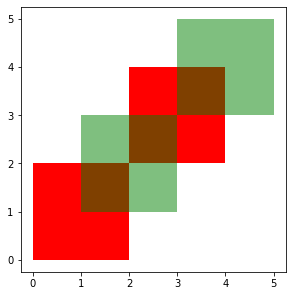

In [64]:
ax = df1.plot(color="red")
df2.plot(ax=ax, color="green", alpha=0.5)

In [46]:
res_union = geopandas.overlay(df1, df2, how="union")

In [50]:
res_union

,df1,df2,geometry
0,red,green_low,"POLYGON ((2 2, 2 3, 3 3, 3 2, 2 2))"
1,red,green_high,"POLYGON ((3 4, 4 4, 4 3, 3 3, 3 4))"
2,red,NaN,"(POLYGON ((2 3, 2 4, 3 4, 3 3, 2 3)), POLYGON ..."
3,NaN,green_low,"POLYGON ((1 1, 1 3, 2 3, 2 2, 3 2, 3 1, 1 1))"
4,NaN,green_high,"POLYGON ((3 4, 3 5, 5 5, 5 3, 4 3, 4 4, 3 4))"


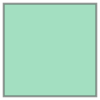

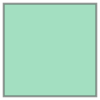

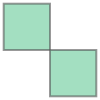

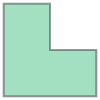

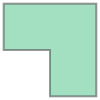

In [57]:
for geo in res_union.geometry:
    geo

In [65]:
res_inter = geopandas.overlay(df1, df2, how="intersection")

In [66]:
res_inter

,df1,df2,geometry
0,red_low,green_low,"POLYGON ((1 2, 2 2, 2 1, 1 1, 1 2))"
1,red_high,green_low,"POLYGON ((2 2, 2 3, 3 3, 3 2, 2 2))"
2,red_high,green_high,"POLYGON ((3 4, 4 4, 4 3, 3 3, 3 4))"


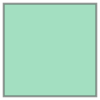

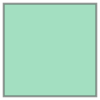

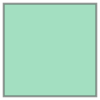

In [67]:
for geo in res_inter.geometry:
    geo

In [73]:
df1_shifted

,geometry,df1_shifted
0,"POLYGON ((1 0, 3 0, 3 2, 1 2, 1 0))",red_low_shifted
1,"POLYGON ((3 2, 5 2, 5 4, 3 4, 3 2))",red_high_shifted


In [74]:
res_inter = geopandas.overlay(df1, df1_shifted, how="intersection")

In [75]:
res_inter

,df1,df1_shifted,geometry
0,red_low,red_low_shifted,"POLYGON ((1 2, 2 2, 2 0, 1 0, 1 2))"
1,red_high,red_high_shifted,"POLYGON ((3 4, 4 4, 4 2, 3 2, 3 4))"


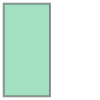

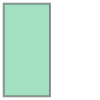

In [76]:
for geo in res_inter.geometry:
    geo

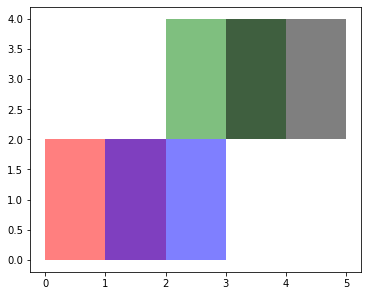

In [84]:
df1_with_shifted.plot(color="r g b k".split(), alpha=0.5)

In [85]:
geopandas.overlay(df1_with_shifted, df1_with_shifted, how="intersection")

,df1_with_shifted_1,df1_with_shifted_2,geometry
0,0,0,"POLYGON ((0 0, 0 2, 2 2, 2 0, 0 0))"
1,2,0,"POLYGON ((1 0, 1 2, 2 2, 2 0, 1 0))"
2,0,2,"POLYGON ((1 2, 2 2, 2 0, 1 0, 1 2))"
3,2,2,"POLYGON ((1 0, 1 2, 3 2, 3 0, 1 0))"
4,1,1,"POLYGON ((2 2, 2 4, 4 4, 4 2, 2 2))"
5,3,1,"POLYGON ((3 2, 3 4, 4 4, 4 2, 3 2))"
6,1,3,"POLYGON ((3 4, 4 4, 4 2, 3 2, 3 4))"
7,3,3,"POLYGON ((3 2, 3 4, 5 4, 5 2, 3 2))"


In [1]:
import shapely

In [2]:
import intake

Intake is a new data dissemination package.
I packed up the planetfour data into an installable package that simply downloads the files when required:

In [3]:
list(intake.cat.planet4)

['fans', 'blotches', 'tile_coordinates', 'metadata', 'region_names']

In [45]:
tiles = intake.cat.planet4.tile_coordinates.read()

For working while not online, I keep a copy in this folder:

In [46]:
tiles.to_csv(
    "tile_coordinates.csv", index=False
)  # don't need the row counter stored in the CSV

In [4]:
import shapely


def get_outer_polygon_for_obsid(obsid):
    tiles = pd.read_csv("tile_coordinates.csv")
    obsid_tiles = tiles.query("obsid == @obsid")
    cols = "BodyFixedCoordinateX BodyFixedCoordinateY".split()
    coords = obsid_tiles[cols]
    coords.columns = ["x", "y"]
    mp = shapely.geometry.MultiPoint(list(zip(coords.x, coords.y)))
    return mp

In [5]:
obsid = "ESP_012079_0945"

In [6]:
mp = get_outer_polygon_for_obsid(obsid)

AttributeError: module 'shapely' has no attribute 'geometry'

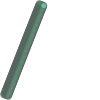

In [52]:
mp